<a href="https://colab.research.google.com/github/InesAlarcon/SeminarioProfesional/blob/master/Lab02-TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import Sequential
from tensorflow.keras.utils import get_file
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import shutil
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

TensorFlow 2.x selected.


In [2]:
!pip install googleimagedownloader
from googleimagedownloader.googleimagedownloader import GoogleImageDownloader

In [0]:
IMAGE_SIZE = (224, 224)

In [0]:
classifier_url ="https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4" 

In [0]:
classifier = Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SIZE+(3,))
])

In [0]:
labels_path = get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

# Transfer Learning

## Build the dataset

In [0]:
class_names = ['carrot','cucumber']
path = 'dataset/'

train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')

train_ca_dir = os.path.join(train_dir, 'carrot')  
train_im_dir = os.path.join(train_dir, 'cucumber')  
validation_ca_dir = os.path.join(validation_dir, 'carrot') 
validation_im_dir = os.path.join(validation_dir, 'cucumber')  

if os.path.exists(path):
  shutil.rmtree(path)

os.makedirs(train_ca_dir)
os.makedirs(train_im_dir)
os.makedirs(validation_ca_dir)    
os.makedirs(validation_im_dir)

In [0]:
def manage_images(src, dest_train, dest_val, image_resize=IMAGE_SIZE, val_split=0.1, prefix=''):
  total = len(os.listdir(src))
  val = np.int(total*val_split)
  count = 0
  files = os.listdir(src)

  for file_name in files:
    try:
      dest = dest_train if count >= val else dest_val
      dest_file = os.path.join(dest, prefix + file_name) 

      img = Image.open(os.path.join(src,file_name))
      img.verify()

      img = Image.open(os.path.join(src,file_name))
      #resize
      img = img.resize(image_resize, Image.ANTIALIAS)
      #move
      img.save(dest_file)  
      count+=1 
    except Exception as e:
        print('Invalid image: ',file_name,e)
        if os.path.exists(dest_file):
          os.remove(dest_file)
  return


In [0]:
img_dir = os.path.realpath('Images/')

In [10]:
queries = ['carrot','cucumber']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query=''+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_ca_dir, validation_ca_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=carrot&source=lnms&tbm=isch
Total Time : 0:00:09.091575
Invalid image:  91.jpg cannot identify image file '/content/Images/91.jpg'
Invalid image:  14.jpg cannot write mode P as JPEG
Invalid image:  80.jpg cannot write mode P as JPEG
Invalid image:  15.jpg cannot write mode RGBA as JPEG
Invalid image:  57.jpg cannot identify image file '/content/Images/57.jpg'
Invalid image:  53.jpg cannot write mode RGBA as JPEG
Invalid image:  9.jpg cannot write mode P as JPEG
Invalid image:  50.jpg cannot write mode RGBA as JPEG
Invalid image:  40.jpg cannot identify image file '/content/Images/40.jpg'
https://www.google.co.in/search?q=cucumber&source=lnms&tbm=isch
Total Time : 0:00:00.000488
Invalid image:  91.jpg cannot identify image file '/content/Images/91.jpg'
Invalid image:  14.jpg cannot write mode P as JPEG
Invalid image:  80.jpg cannot write mode P as JPEG
Invalid image:  15.jpg cannot write mode RGBA as JPEG
Invalid image:  57.jpg cannot identify image fil

In [11]:
queries = ['carrot','cucumber']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query=''+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_im_dir, validation_im_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=carrot&source=lnms&tbm=isch
Total Time : 0:00:10.065139
Invalid image:  91.jpg cannot identify image file '/content/Images/91.jpg'
Invalid image:  14.jpg cannot write mode P as JPEG
Invalid image:  80.jpg cannot write mode P as JPEG
Invalid image:  15.jpg cannot write mode RGBA as JPEG
Invalid image:  57.jpg cannot identify image file '/content/Images/57.jpg'
Invalid image:  53.jpg cannot write mode RGBA as JPEG
Invalid image:  9.jpg cannot write mode P as JPEG
Invalid image:  50.jpg cannot write mode RGBA as JPEG
Invalid image:  40.jpg cannot identify image file '/content/Images/40.jpg'
https://www.google.co.in/search?q=cucumber&source=lnms&tbm=isch
Total Time : 0:00:06.565059
Invalid image:  88.jpg cannot identify image file '/content/Images/88.jpg'
Invalid image:  74.jpg cannot write mode P as JPEG
Invalid image:  6.jpg cannot identify image file '/content/Images/6.jpg'
Invalid image:  25.jpg cannot identify image file '/content/Images/25.jpg'
Inval

In [12]:
total_train = len(os.listdir(train_ca_dir))+ len(os.listdir(train_im_dir))
total_val = len(os.listdir(validation_ca_dir))+ len(os.listdir(validation_im_dir))

print('total training carrot images:', len(os.listdir(train_ca_dir)))
print('total training cucumber images:', len(os.listdir(train_im_dir)))

print('total validation carrot images:', len(os.listdir(validation_ca_dir)))
print('total validation cucumber images:', len(os.listdir(validation_im_dir)))
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training carrot images: 162
total training cucumber images: 158
total validation carrot images: 20
total validation cucumber images: 20
--
Total training images: 320
Total validation images: 40


## Using the dataset

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [14]:
train_data_gen = train_image_generator.flow_from_directory(train_dir,
                                                           shuffle=True,
                                                           batch_size=32,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')

Found 320 images belonging to 2 classes.


In [15]:
val_data_gen = validation_image_generator.flow_from_directory(validation_dir,
                                                              target_size=IMAGE_SIZE,
                                                              class_mode='binary')

Found 40 images belonging to 2 classes.


## Testing the classifier

In [0]:
image_batch, labels_batch = next(train_data_gen)

In [17]:
result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

In [18]:
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['quill', 'quill', 'letter opener', 'cucumber', 'croquet ball',
       'tennis ball', 'cheeseburger', 'maraca', 'cucumber', 'cucumber',
       'hotdog', 'candle', 'strawberry', 'banana', 'starfish', 'quill',
       'ear', 'saltshaker', 'buckeye', 'hotdog', 'ear', 'cucumber',
       'hotdog', 'corn', 'quill', 'swab', 'hotdog', 'Petri dish',
       'cucumber', 'flamingo', 'Christmas stocking', 'banana'],
      dtype='<U30')

In [0]:
def plot_images(img_batch, labels, predicted_labels):
  plt.figure(figsize=(12,12))
  plt.subplots_adjust(hspace=0.5)
  for i in range(15):
    plt.subplot(6,5,i+1) 
    plt.imshow(img_batch[i])
    color = "green" if predicted_labels[i] == class_names[np.int(labels[i])] else "red"
    plt.title(predicted_labels[i], color=color)
    plt.axis('off')

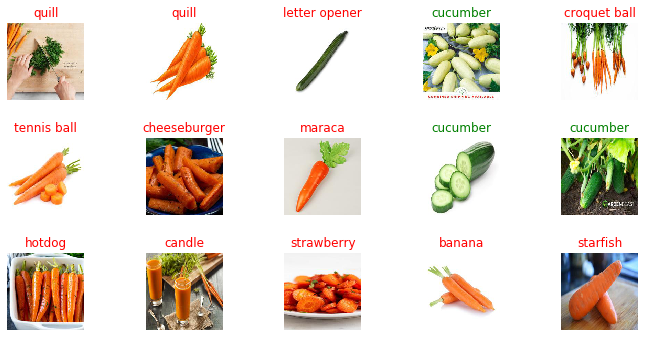

In [20]:
plot_images(image_batch, labels_batch, predicted_class_names)

## Downloading headless model

In [0]:
feature_extractor_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [0]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=IMAGE_SIZE+(3,))

In [23]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 2048)


In [0]:
feature_extractor_layer.trainable = False

## Adding a classification head

In [25]:
model = Sequential([
  feature_extractor_layer,
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 2048)              23564800  
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_________________________________________________________________


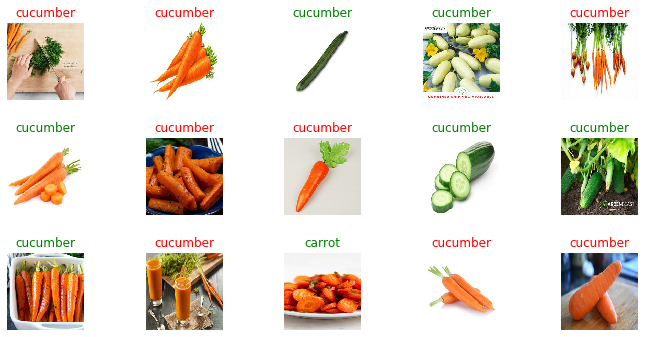

In [26]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)

## Train the model

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(
    train_data_gen,
    epochs=10,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 2 steps
Epoch 1/10
5/5 [==============================] - 30s 6s/step - loss: 1.3437 - accuracy: 0.5562 - val_loss: 0.9261 - val_accuracy: 0.6000
Epoch 2/10
5/5 [==============================] - 27s 5s/step - loss: 1.0180 - accuracy: 0.7188 - val_loss: 1.1198 - val_accuracy: 0.6250
Epoch 3/10
5/5 [==============================] - 27s 5s/step - loss: 1.0215 - accuracy: 0.5938 - val_loss: 0.9656 - val_accuracy: 0.5750
Epoch 4/10
5/5 [==============================] - 27s 5s/step - loss: 0.6857 - accuracy: 0.6750 - val_loss: 0.5729 - val_accuracy: 0.6750
Epoch 5/10
5/5 [==============================] - 27s 5s/step - loss: 0.6320 - accuracy: 0.6438 - val_loss: 0.6353 - val_accuracy: 0.6500
Epoch 6/10
4/5 [=======================>......] - ETA: 4s - loss: 0.5359 - accuracy: 0.6875

## Check results

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()

plot_images(image_batch, labels_batch, predicted_class_names)

##Application base model

In [0]:
base_model = ResNet50V2(input_shape=IMAGE_SIZE+(3,),
                                               include_top=False,
                                               weights='imagenet')

In [0]:
base_model.trainable = False

In [0]:
base_model.summary()

In [0]:
model = Sequential([
  base_model,
  GlobalAveragePooling2D(),
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')    
])
model.summary()

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(
    train_data_gen,
    epochs=10,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,0.8])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)

## Fine tuning

In [0]:
base_model.trainable = True

In [0]:
print("Number of layers in the base model: ", len(base_model.layers))
fine_tune_at = 160
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

In [0]:
initial_epochs = 10
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_data_gen,
                         epochs=total_epochs,
                         steps_per_epoch=5,
                         initial_epoch =  history.epoch[-1],
                         validation_data=val_data_gen)

In [0]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.5, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 7.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)